# 1. Extract Zip File

In [1]:
import zipfile
import os

In [2]:
file_name = 'archive.zip'
zip_file = zipfile.ZipFile(file_name)
zip_file.extractall()
zip_file.close()

In [3]:
# print file in dir
os.listdir()

['.ipynb_checkpoints',
 'archive.zip',
 'Credit Loan Approval.ipynb',
 'train_u6lujuX_CVtuZ9i (1).csv']

# 2. Read Data

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. Exploratory Data Analysis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [7]:
df.shape

(614, 13)

In [8]:
df.describe() # print descriptive statistic

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# print null data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# print duplicated data
df.duplicated().sum()

0

**Summary**
1. Data has 614 rows and 13 columns (1 columns is Label)
2. Useful variables are : Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area and Loan_Status

## -- Gender

In [12]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
# print proportion missing values
print(np.round(df['Gender'].isnull().sum()/df.shape[0]*100,2),'%')

2.12 %


<AxesSubplot:xlabel='Gender', ylabel='count'>

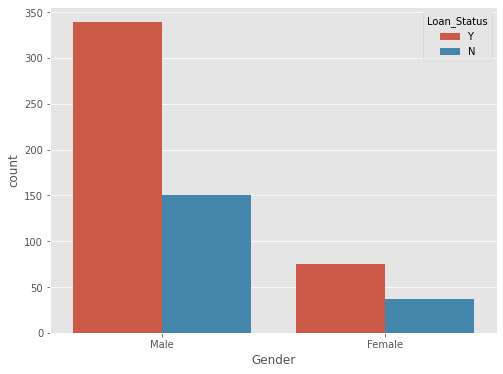

In [14]:
# vizualize count gender by loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df, hue='Loan_Status')

Based on figure above, most applicant is male and over 400 total applicant is accept for loan which is 2/3 applicant

## -- Married

In [15]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
# print proportion missing values
print(np.round(df['Married'].isnull().sum()/df.shape[0]*100,2),'%')

0.49 %


<AxesSubplot:xlabel='Married', ylabel='count'>

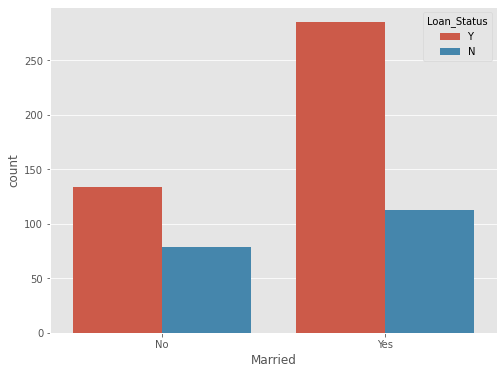

In [17]:
# vizualize count gender by loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Married', data=df, hue='Loan_Status')

Based on figure above, most loan approve by people was married. Assume if the person is married probably got high chance being accept for loan

## -- Dependents

In [18]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [19]:
# print proportion missing values
print(np.round(df['Dependents'].isnull().sum()/df.shape[0]*100,2),'%')

2.44 %


<AxesSubplot:xlabel='Dependents', ylabel='count'>

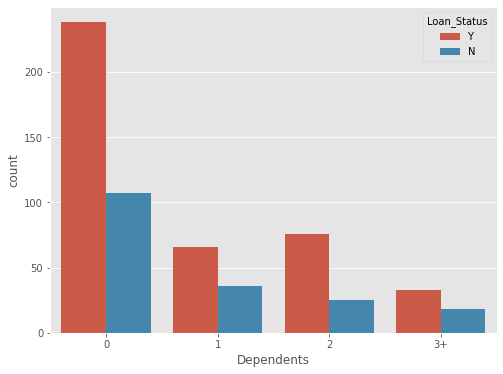

In [20]:
# vizualize count gender by loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Dependents', data=df, hue='Loan_Status')

Based on figure above, Majority of the population have zero dependents and are also likely to accepted for loan.

## -- Education

In [21]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<AxesSubplot:xlabel='Education', ylabel='count'>

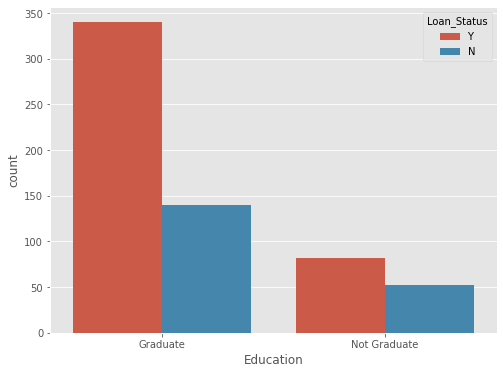

In [22]:
# vizualize count gender by loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Education', data=df, hue='Loan_Status')

Based on figure above, most graduate people got accept for loan. Assume if person has graduate, probably got high chance to be accepted

## -- Self Employed

In [23]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
# print proportion missing values
print(np.round(df['Self_Employed'].isnull().sum()/df.shape[0]*100,2),'%')

5.21 %


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

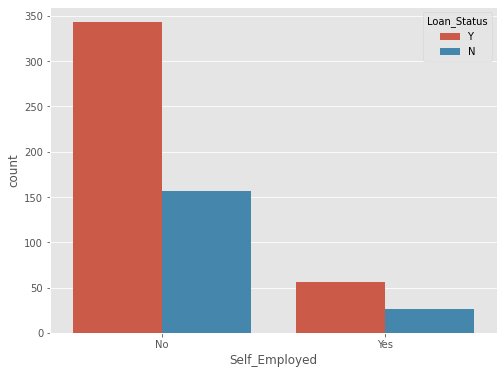

In [25]:
# vizualize count gender by loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Self_Employed', data=df, hue='Loan_Status')

Based on figure above, most applicant was not self employed

## -- Credit History

In [26]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [27]:
# print proportion missing values
print(np.round(df['Credit_History'].isnull().sum()/df.shape[0]*100,2),'%')

8.14 %


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

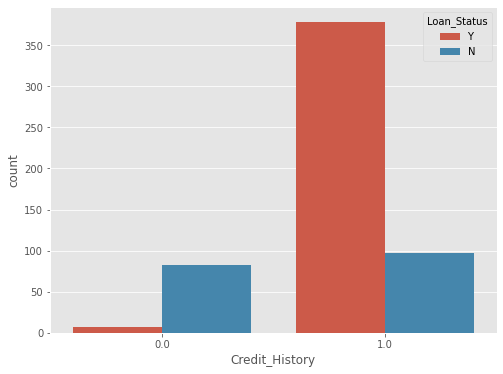

In [28]:
# vizualize count gender by loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Credit_History', data=df, hue='Loan_Status')

Based figure above, probability person got accept for loan if has credit history

## -- Property Area

In [29]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

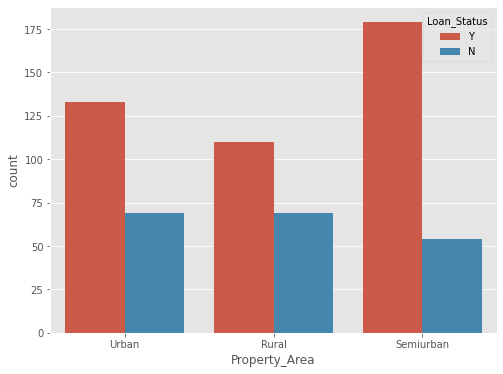

In [30]:
# vizualize count gender by loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Property_Area', data=df, hue='Loan_Status')

Based on figure above, most applicant got accept loan from Semi-urban

# -- Numerical Variable

<Figure size 576x432 with 0 Axes>

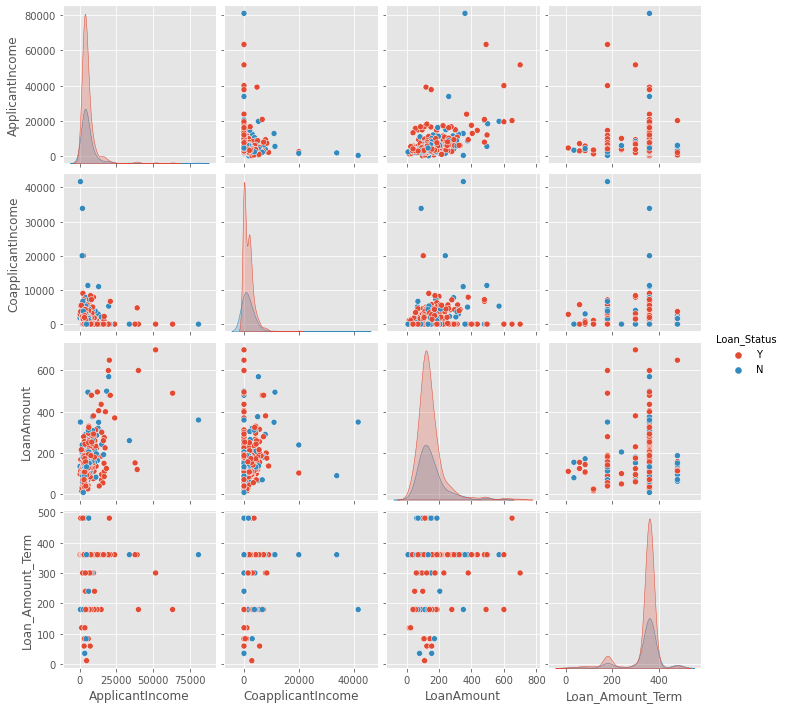

In [31]:
numeric_feature = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']]
plt.figure(figsize=(8,6))
sns.pairplot(data=numeric_feature, hue='Loan_Status')

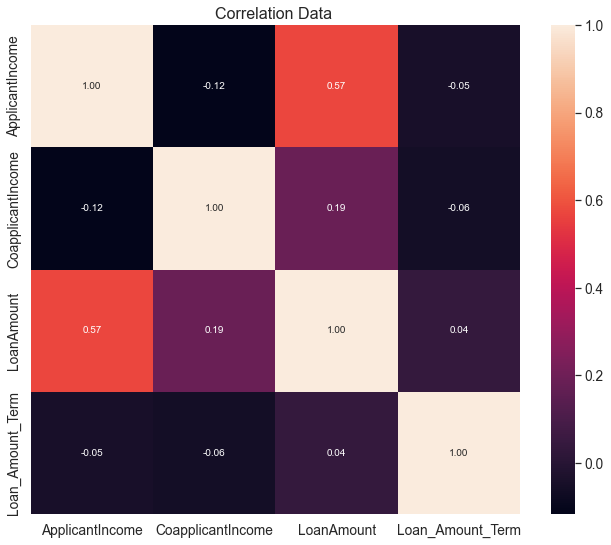

In [32]:
# Vizualize Correlation between feature
corr_num = numeric_feature.corr()
sns.set(font_scale=1.25)
fig,ax= plt.subplots(figsize=(11,9))

sns.heatmap(corr_num, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10}, 
                     yticklabels= corr_num.columns, xticklabels=corr_num.columns)

plt.title('Correlation Data ',fontsize=16)
plt.show()

Based on Correlation matrix above, between Applicant Income and Loan Amount has positive correlation. Assume the Income of applicant is high then loan amount also high too

0 ApplicantIncome
1 CoapplicantIncome
2 LoanAmount
3 Loan_Amount_Term


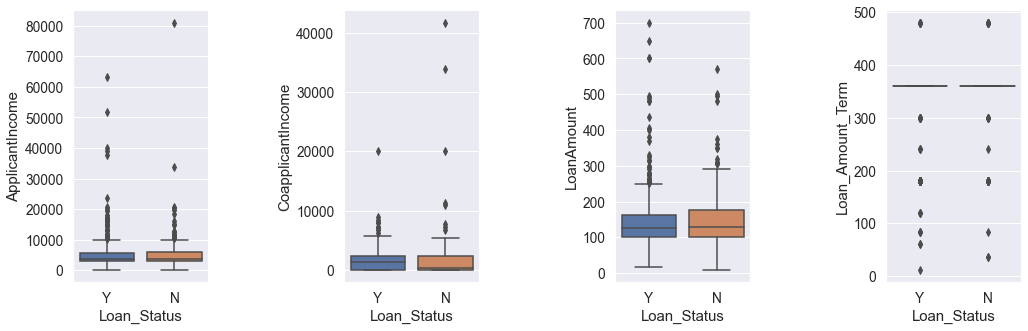

In [33]:
# vizualize box plot
fig,axs = plt.subplots(1,4,figsize=(17,5))
for idx,num_col in enumerate (numeric_feature.columns[:-1]):
    print(idx, num_col)
    sns.boxplot(y=num_col, data=df, x='Loan_Status', ax=axs[idx])
plt.subplots_adjust(hspace=1,wspace=1)

## - Correlation

In [34]:
# Measure correlation between numerical feature and label
from scipy.stats import f_oneway

In [39]:
numeric_feature = numeric_feature.dropna()
numeric_names = numeric_feature.columns[:-1]

for feature in numeric_names:
    Category_group_list = numeric_feature.groupby('Loan_Status')[feature].apply(list)
    anova_result = f_oneway(*Category_group_list)
    print('ANOVA result between',feature,'and Loan_Status is',anova_result[1])

ANOVA result between ApplicantIncome and Loan_Status is 0.891907519911222
ANOVA result between CoapplicantIncome and Loan_Status is 0.09198194396495762
ANOVA result between LoanAmount and Loan_Status is 0.31462975379018815
ANOVA result between Loan_Amount_Term and Loan_Status is 0.47192081643596306


From ANOVA, there is no specific relation between numerical feature and Loan_Status because p-value > 0.05 (H0 Accepted)

In [40]:
# # Measure correlation between numerical feature and label
from scipy.stats import chi2_contingency

In [41]:
cat_features = df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']]
for feature in cat_features:
    Crosstab = pd.crosstab(index=cat_features[feature], columns= df['Loan_Status'])
    Chiqresult = chi2_contingency(Crosstab)
    print('Chi result between', feature, 'and Loan_Status is', Chiqresult[1])

Chi result between Gender and Loan_Status is 0.7086529816451106
Chi result between Married and Loan_Status is 0.03439381301579988
Chi result between Dependents and Loan_Status is 0.3678506740863211
Chi result between Education and Loan_Status is 0.04309962129357355
Chi result between Self_Employed and Loan_Status is 1.0
Chi result between Property_Area and Loan_Status is 0.0021360187811644937
Chi result between Credit_History and Loan_Status is 7.184759548750746e-40


From ChiSqure, feature: Married, Education, Property_Area and Credit_History has relation with Loan_Status because p-value < 0.05(H0 Rejected)

# 4. Data Cleaning

In [130]:
# Feature selection
df_selection = df.drop(['Loan_ID','Gender','Dependents','Self_Employed'],axis=1)
df_selection.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,Graduate,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0

In [131]:
# fill missing categorical feature
df_selection_cat = df_selection[['Married','Education','Credit_History','Property_Area']]
df_selection_cat['Married'].fillna(df_selection_cat['Married'].mode()[0],inplace=True)
df_selection_cat['Credit_History'].fillna(df_selection_cat['Credit_History'].mode()[0],inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6668\2584829510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection_cat['Married'].fillna(df_selection_cat['Married'].mode()[0],inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6668\2584829510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection_cat['Credit_History'].fillna(df_selection_cat['Credit_History'].mode()[0],inplace=True)


In [152]:
df_selection_cat.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


In [132]:
df_selection_cat.isnull().sum()

Married           0
Education         0
Credit_History    0
Property_Area     0
dtype: int64

In [133]:
# fill missing numerical feature
df_selection_num = df_selection.drop(['Married','Education','Credit_History','Property_Area','Loan_Status'],axis=1)
df_selection_num.fillna(df_selection_num.mean(),inplace=True)

In [134]:
df_selection_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,146.412162,360.0
1,4583,1508.0,128.000000,360.0
2,3000,0.0,66.000000,360.0
3,2583,2358.0,120.000000,360.0
4,6000,0.0,141.000000,360.0


In [135]:
df_selection_num.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [143]:
# clear outlier on numerical feature with interquartil 
# use caping winsorized to 
def clear_outlier(num_feature,feature):
    q1 = np.percentile(num_feature[feature],25)
    q3 = np.percentile(num_feature[feature],75)
    iqr = q3-q1
    print('Old Shape:',num_feature.shape)
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    new_num_feature = num_feature.copy()
    new_num_feature[feature] = np.where(
        new_num_feature[feature] > upper,
        upper,
        np.where(
            new_num_feature[feature] < lower,
            lower,
            new_num_feature[feature]
        )
    )
    print('New Shape:',new_num_feature.shape)
    return new_num_feature

new_num_feature = clear_outlier(df_selection_num, 'ApplicantIncome')
new_num_feature = clear_outlier(new_num_feature, 'CoapplicantIncome')
new_num_feature = clear_outlier(new_num_feature, 'LoanAmount')

Old Shape: (614, 4)
New Shape: (614, 4)
Old Shape: (614, 4)
New Shape: (614, 4)
Old Shape: (614, 4)
New Shape: (614, 4)


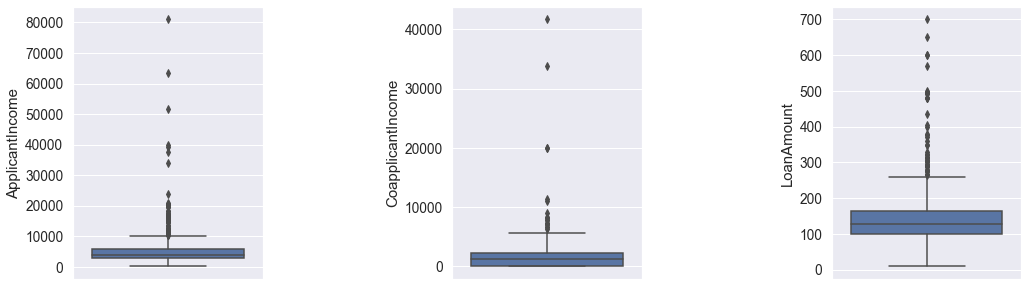

In [150]:
# before clearing outlier
fig,axs = plt.subplots(1,3,figsize=(17,5))
for idx,num_col in enumerate (df_selection_num.columns[:-1]):
    sns.boxplot(y=num_col, data=df_selection_num, ax=axs[idx])
plt.subplots_adjust(hspace=1,wspace=1)

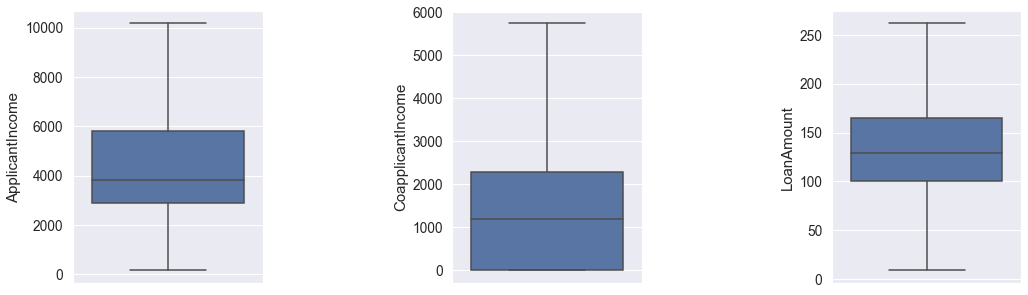

In [151]:
# After clearing outlier
fig,axs = plt.subplots(1,3,figsize=(17,5))
for idx,num_col in enumerate (new_num_feature.columns[:-1]):
    sns.boxplot(y=num_col, data=new_num_feature, ax=axs[idx])
plt.subplots_adjust(hspace=1,wspace=1)

# 5. Feature Engineering

In [153]:
df_selection_cat['Loan_Status'] = df['Loan_Status']
df_selection_cat['Loan_Status'] = df_selection_cat['Loan_Status'].apply(lambda x: 0 if x == 'N' else 1)
df_selection_cat['Married'] = df_selection_cat['Married'].apply(lambda x: 0 if x =='No' else 1)
df_selection_cat['Education'] = df_selection_cat['Education'].apply(lambda x: 0 if x == 'Not Graduate' else 1)

C:\Users\USER\AppData\Local\Temp\ipykernel_6668\2352306816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection_cat['Loan_Status'] = df['Loan_Status']
C:\Users\USER\AppData\Local\Temp\ipykernel_6668\2352306816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection_cat['Loan_Status'] = df_selection_cat['Loan_Status'].apply(lambda x: 0 if x == 'N' else 1)
C:\Users\USER\AppData\Local\Temp\ipykernel_6668\2352306816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [154]:
df_selection_cat.head()

,Married,Education,Credit_History,Property_Area,Loan_Status
0,0,1,1.0,Urban,1
1,1,1,1.0,Rural,0
2,1,1,1.0,Urban,1
3,1,0,1.0,Urban,1
4,0,1,1.0,Urban,1


In [160]:
dummy = pd.get_dummies(df_selection_cat,drop_first=True)
dummy.head()

,Married,Education,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1.0,1,0,1
1,1,1,1.0,0,0,0
2,1,1,1.0,1,0,1
3,1,0,1.0,1,0,1
4,0,1,1.0,1,0,1


In [161]:
df_concat = pd.concat([dummy, df_selection_num],axis=1)
df_concat.head()

,Married,Education,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0,1,1.0,1,0,1,5849,0.0,146.412162,360.0
1,1,1,1.0,0,0,0,4583,1508.0,128.000000,360.0
2,1,1,1.0,1,0,1,3000,0.0,66.000000,360.0
3,1,0,1.0,1,0,1,2583,2358.0,120.000000,360.0
4,0,1,1.0,1,0,1,6000,0.0,141.000000,360.0


# 6. Pre-processing Data

In [164]:
from sklearn.model_selection import train_test_split

In [163]:
X = df_concat.drop('Loan_Status',axis=1)
y = df_concat['Loan_Status']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

In [280]:
print('Train size:', X_train.shape[0])
print('Test size:', X_test.shape[0])

Train size: 491
Test size: 123


# 7. Training and Validation Model

In [389]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## 1. Random Forest

In [286]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)

# Scoring
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred_train))
print("Training Data F1 Score ", f1_score(y_train,y_pred_train))

y_pred_test = rf.predict(X_test)
print("Testing Data Set Accuracy: ", accuracy_score(y_test,y_pred_test))
print("Testing Data F1 Score ", f1_score(y_test,y_pred_test))

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Testing Data Set Accuracy:  0.8617886178861789
Testing Data F1 Score  0.903954802259887


In [375]:
# try using Randomize Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [x for x in range(1,20,1)]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in range(1,80,3)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [0,42]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state' : random_state}
print(param_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79], 'bootstrap': [True, False], 'random_state': [0, 42]}


In [376]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5,n_jobs=1,verbose=2,random_state=42)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=49, min_samples_split=5, n_estimators=157, random_state=42; total time=   0.3s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=49, min_samples_split=5, n_estimators=157, random_state=42; total time=   0.2s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=49, min_samples_split=5, n_estimators=157, random_state=42; total time=   0.2s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=49, min_samples_split=5, n_estimators=157, random_state=42; total time=   0.3s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=49, min_samples_split=5, n_estimators=157, random_state=42; total time=   0.2s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=64, min_samples_split=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=64, min_samples_split=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=64, min_samples_split=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=64, min_samples_split=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=64, min_samples_split=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_

d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=10, random_state=0; total time=   0.0s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=67, min_samples_split=2, n_estimators=73, random_state=0; total time=   0.1s
[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=67, min_samples_split=2, n_estimators=73, random_state=0; total time=   0.1s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=67, min_samples_split=2, n_estimators=73, random_state=0; total time=   0.1s
[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=67, min_samples_split=2, n_estimators=73, random_state=0; total time=   0.1s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=67, min_samples_split=2, n_estimators=73, random_state=0; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=52, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=52, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=52, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=52, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=52, random_state=42; total time=   0.0s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=34, min_samples_split=5, n_estimators=157, random_state=0; total time=   0.3s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=34, min_samples_split=5, n_estimators=157, random_state=0; total time=   0.4s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=34, min_samples_split=5, n_estimators=157, random_state=0; total time=   0.4s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=34, min_samples_split=5, n_estimators=157, random_state=0; total time=   0.4s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=34, min_samples_split=5, n_estimators=157, random_state=0; total time=   0.4s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=70, min_samples_split=2, n_estimators=115, random_state=42; total time=   0.2s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=70, min_samples_split=2, n_estimators=115, random_state=42; total time=   0.1s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=70, min_samples_split=2, n_estimators=115, random_state=42; total time=   0.2s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=70, min_samples_split=2, n_estimators=115, random_state=42; total time=   0.2s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=70, min_samples_split=2, n_estimators=115, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=64, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=67, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=67, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=67, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=67, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=67, min_samples_split=5, n_estimators=31, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115, random_state=0; total time=   0.1s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115, random_state=0; total time=   0.1s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115, random_state=0; total time=   0.1s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115, random_state=0; total time=   0.2s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115, random_state=0; total time=   0.1s


d:\1133\python_3.8.0\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4, 7, 10, 13,
                                                             16, 19, 22, 25, 28,
                                                             31, 34, 37, 40, 43,
                                                             46, 49, 52, 55, 58,
                                                             61, 64, 67, 70, 73,
                                                             76, 79],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200],
                                        'random_state': [0, 42]},
                   random_state=42, verbose=2)

In [377]:
rf_random.best_params_

{'random_state': 0,
 'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 17,
 'bootstrap': False}

In [392]:
rf = RandomForestClassifier(n_estimators=10, random_state=0, min_samples_split=5, min_samples_leaf=10, max_depth=17,
                           max_features='sqrt',bootstrap=False)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)

# Scoring
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred_train))
print("Training Data F1 Score ", f1_score(y_train,y_pred_train))

y_pred_test = rf.predict(X_test)
print("Testing Data Set Accuracy: ", accuracy_score(y_test,y_pred_test))
print("Testing Data F1 Score ", f1_score(y_test,y_pred_test))

Training Data Set Accuracy:  0.8187372708757638
Training Data F1 Score  0.881491344873502
Testing Data Set Accuracy:  0.8536585365853658
Testing Data F1 Score  0.9021739130434783


<AxesSubplot:>

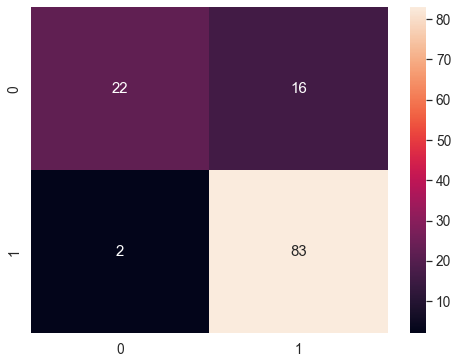

In [393]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

## 2. Logistic Regression

In [394]:
from sklearn.linear_model import LogisticRegression

In [395]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)

# Scoring
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred_train))
print("Training Data F1 Score ", f1_score(y_train,y_pred_train))

y_pred_test = svm.predict(X_test)
print("Testing Data Set Accuracy: ", accuracy_score(y_test,y_pred_test))
print("Testing Data F1 Score ", f1_score(y_test,y_pred_test))

Training Data Set Accuracy:  0.8004073319755601
Training Data F1 Score  0.870712401055409
Testing Data Set Accuracy:  0.6910569105691057
Testing Data F1 Score  0.8173076923076924


In [384]:
from scipy.stats import loguniform

solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
C = loguniform(1e-5, 100)

In [385]:
param_grid = {'solver': solver,
               'penalty': penalty,
               'C': C}
print(param_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002012E64FC40>}


In [386]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=5,n_jobs=1,verbose=2,random_state=42)
lr_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.004185822729546973, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004185822729546973, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004185822729546973, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004185822729546973, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004185822729546973, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.330324510152291, penalty=none, solver=newton-cg; total time=   0.0s


d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.330324510152291, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.330324510152291, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.330324510152291, penalty=none, solver=newton-cg; total time=   0.0s


d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_log

[CV] END C=1.330324510152291, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00012363188277052212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00012363188277052212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00012363188277052212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00012363188277052212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00012363188277052212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.5502648504032844e-05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2.5502648504032844e-05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2.5502648504032844e-05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2.5502648504032844e-05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2.5502648504032844e-05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.16136341713591318, penalty

d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.1206348817742242e-05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.1206348817742242e-05, penalty=none, solver=newton-cg; total time=   0.0s


d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_log

[CV] END C=1.1206348817742242e-05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.1206348817742242e-05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=0.047143586818602236, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.047143586818602236, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.047143586818602236, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.047143586818602236, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.047143586818602236, penalty=l2, solver=lbfgs; total time=   0.0s


d:\1133\python_3.8.0\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\1133\python_3.8.0\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py", line 78, in _check_solver
    raise ValueError("penalty='none' is not 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002012E64FC40>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=42, verbose=2)

In [396]:
lr_random.best_params_

{'C': 1.330324510152291, 'penalty': 'none', 'solver': 'newton-cg'}

In [397]:
lr = LogisticRegression(penalty='none',C=1.330324510152291, solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)

# Scoring
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred_train))
print("Training Data F1 Score ", f1_score(y_train,y_pred_train))

y_pred_test = svm.predict(X_test)
print("Testing Data Set Accuracy: ", accuracy_score(y_test,y_pred_test))
print("Testing Data F1 Score ", f1_score(y_test,y_pred_test))

Training Data Set Accuracy:  0.8004073319755601
Training Data F1 Score  0.8710526315789474
Testing Data Set Accuracy:  0.6910569105691057
Testing Data F1 Score  0.8173076923076924


d:\1133\python_3.8.0\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
d:\1133\python_3.8.0\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


<AxesSubplot:>

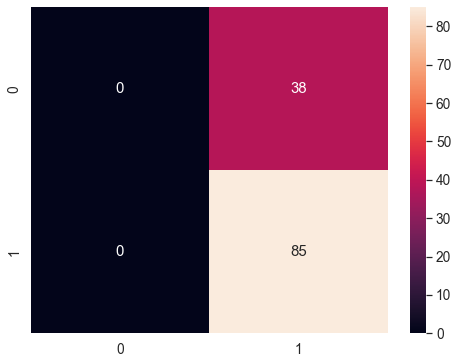

In [398]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)